In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.vis_utils import plot_model


# Loading the Dataset

In [2]:
#Loading the dataset
data = pd.read_csv('../input/sanskrit-shlokas-dataset/train.csv')

In [3]:
data

,Sloka,Class
0,यस्मात् त्रस्यन्ति भूतानि मृगव्याधान्मृगा इव। ...,Vidur Niti Slokas
1,एतान्यनिगृहीतानि व्यापादयितुमप्यलम्। ...,Vidur Niti Slokas
2,यावत्स्वस्थो ह्यय देहः तावन्मृत्युश्च दूरतः। ...,Chanakya Slokas
3,ईश्वरस्य स्मरणं प्रभाते उत्थाय अवश्यं कर्तं...,sanskrit-slogan
4,लोकयात्रा भयं लज्जा दाक्षिण्यं त्यागशीलता। ...,Chanakya Slokas
...,...,...
378,सुखं च दुःखं च भवाभवौ च लाभालाभौ मरणं जीवितं च...,Vidur Niti Slokas
379,नात्यन्तं सरलेन भाव्यं गत्वा पश्य वनस्थलीम्। ...,Chanakya Slokas
380,ब्राह्मणं ब्राह्मणो वेद भर्ता वेद स्त्रियं तथा...,Vidur Niti Slokas
381,जले तैलं खले गुह्यं पात्रे दानं मनागपि । ...,Chanakya Slokas


# Exploratory Data Analysis on the Corpus

In [4]:
#Storing the training text into a sinlge corpus
text = ""
for i in data['Sloka'].values:
    text =  text + i.strip()
    
text

'यस्मात् त्रस्यन्ति भूतानि मृगव्याधान्मृगा इव।                            सागरान्तामपि महीं लब्ध्वा स परिहीयते ॥एतान्यनिगृहीतानि  व्यापादयितुमप्यलम्।                            अविधेया इवादान्ता हयाः पथि कुसारथिम् ॥यावत्स्वस्थो ह्यय देहः तावन्मृत्युश्च दूरतः।                                   तावदात्महितं कुर्यात् प्रणान्ते किं करिष्यति॥ईश्वरस्य  स्मरणं प्रभाते उत्थाय अवश्यं  कर्तंव्यम् ॥लोकयात्रा भयं लज्जा दाक्षिण्यं त्यागशीलता।                                   पञ्च यत्र न विद्यन्ते न कुर्यात्तत्र संगतिम् ॥सा भार्या या सुचिदक्षा सा भार्या या पतिव्रता।                                  सा भार्या या पतिप्रीता सा भार्या सत्यवादिनी ॥सहायबन्धना ह्यर्थाः सहायाश्चर्थबन्धनाः।                            अन्योऽन्यबन्धनावेतौ विनान्योऽन्यं न सिध्यतः॥एकेनापि सुवर्ण पुष्पितेन सुगन्धिता।                                    वसितं तद्वनं सर्वं सुपुत्रेण कुलं यथा॥उपदेशो हि मूर्खणां प्रकोपाय न शान्तये ॥मित्रं भुड्क्ते संविभज्याश्रितेभ्यो मितं स्वपित्यमितं  कर्म कृत्वा ।                            ददात्यम

In [5]:
#Generating text Vocabulary 
vocab = dict()
for word in text.split():
    if word not in vocab.keys():
        vocab[word] = 0
    vocab[word] = vocab[word] +1

In [6]:
vocab

{'यस्मात्': 1,
 'त्रस्यन्ति': 1,
 'भूतानि': 1,
 'मृगव्याधान्मृगा': 1,
 'इव।': 1,
 'सागरान्तामपि': 1,
 'महीं': 1,
 'लब्ध्वा': 1,
 'स': 24,
 'परिहीयते': 1,
 '॥एतान्यनिगृहीतानि': 1,
 'व्यापादयितुमप्यलम्।': 1,
 'अविधेया': 1,
 'इवादान्ता': 1,
 'हयाः': 1,
 'पथि': 1,
 'कुसारथिम्': 1,
 '॥यावत्स्वस्थो': 1,
 'ह्यय': 1,
 'देहः': 1,
 'तावन्मृत्युश्च': 1,
 'दूरतः।': 1,
 'तावदात्महितं': 1,
 'कुर्यात्': 2,
 'प्रणान्ते': 1,
 'किं': 5,
 'करिष्यति॥ईश्वरस्य': 1,
 'स्मरणं': 1,
 'प्रभाते': 1,
 'उत्थाय': 1,
 'अवश्यं': 1,
 'कर्तंव्यम्': 1,
 '॥लोकयात्रा': 1,
 'भयं': 7,
 'लज्जा': 1,
 'दाक्षिण्यं': 1,
 'त्यागशीलता।': 1,
 'पञ्च': 2,
 'यत्र': 10,
 'न': 122,
 'विद्यन्ते': 2,
 'कुर्यात्तत्र': 1,
 'संगतिम्': 1,
 '॥सा': 1,
 'भार्या': 8,
 'या': 6,
 'सुचिदक्षा': 1,
 'सा': 5,
 'पतिव्रता।': 1,
 'पतिप्रीता': 1,
 'सत्यवादिनी': 1,
 '॥सहायबन्धना': 1,
 'ह्यर्थाः': 1,
 'सहायाश्चर्थबन्धनाः।': 1,
 'अन्योऽन्यबन्धनावेतौ': 1,
 'विनान्योऽन्यं': 1,
 'सिध्यतः॥एकेनापि': 1,
 'सुवर्ण': 1,
 'पुष्पितेन': 1,
 'सुगन्धिता।': 1,
 'वसितं': 1,
 

In [7]:
#Generating top 2 percentile list 
freqs = np.array(list(vocab.values()))
percentile_val = np.percentile(freqs, 99)
percentile_val

7.0

In [8]:
stopwords = list()
for i in vocab.keys():
    if vocab[i] > percentile_val:
        stopwords.append(i)

stopwords

['स',
 'यत्र',
 'न',
 'भार्या',
 'सर्वं',
 'हि',
 '।',
 'च',
 '॥न',
 'वै',
 'सर्वत्र',
 'नास्ति',
 'मित्रं',
 'विद्या',
 'एव',
 'तस्य',
 'यो',
 'तु',
 'च।',
 'रक्ष्यते',
 'यः']

(-0.5, 799.5, 799.5, -0.5)

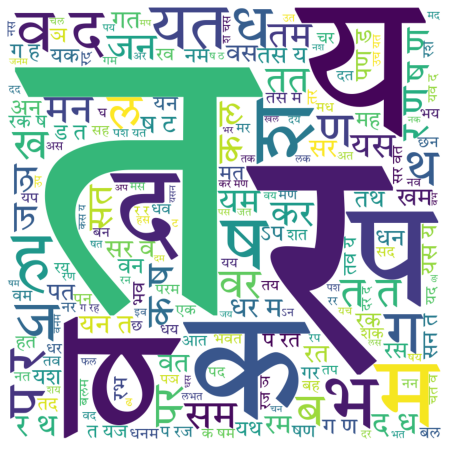

In [9]:
wordcloud = WordCloud(font_path= '../input/devanagari/TiroDevanagariSanskrit-Regular.ttf',width = 800, height = 800,background_color = 'white', stopwords = stopwords,min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')

In [10]:
d = data['Class'].value_counts()

In [11]:
d

Chanakya Slokas      138
sanskrit-slogan      127
Vidur Niti Slokas    118
Name: Class, dtype: int64

In [12]:
d['Chanakya Slokas']

138

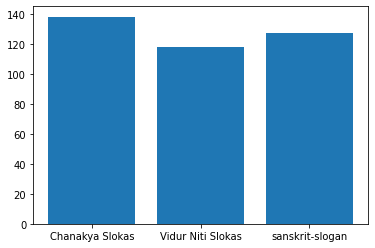

In [13]:
#Plot class label frequencies
Class = data['Class'].value_counts()
names = ['Chanakya Slokas','Vidur Niti Slokas','sanskrit-slogan']
values = [Class['Chanakya Slokas'],Class['Vidur Niti Slokas'],Class['sanskrit-slogan']]

plt.bar(range(len(values)), values, tick_label=names)
plt.show()

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data['Sloka'].values)
X = tokenizer.texts_to_sequences(data['Sloka'].values)
X = pad_sequences(X)

In [15]:
X

array([[  0,   0,   0, ...,   6, 320,   1],
       [  0,   0,   0, ..., 326, 327,   1],
       [  0,   0,   0, ..., 334,  19, 335],
       ...,
       [  0,   0,   0, ..., 239,  76,  42],
       [  0,   0,   0, ...,   4, 100,  38],
       [  0,   0,   0, ...,   0,   0,   1]], dtype=int32)

In [16]:
X.shape

(383, 16)

In [17]:
#One Hot Encoding cLASSES
Y= pd.get_dummies(data['Class'])

In [18]:
Y

,Chanakya Slokas,Vidur Niti Slokas,sanskrit-slogan
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
378,0,1,0
379,1,0,0
380,0,1,0
381,1,0,0


In [19]:
Y.shape

(383, 3)

In [20]:
#Model Building
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(704, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(352, activation='LeakyReLU'))
model.add(Dense(176, activation='LeakyReLU'))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

2022-07-23 13:56:26.835120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 13:56:26.979034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 13:56:26.979799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 13:56:26.981115: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 120)           60000     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 16, 120)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 704)               2323200   
_________________________________________________________________
dense (Dense)                (None, 352)               248160    
_________________________________________________________________
dense_1 (Dense)              (None, 176)               62128     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 531       
Total params: 2,694,019
Trainable params: 2,694,019
Non-trainable params: 0
______________________________________________

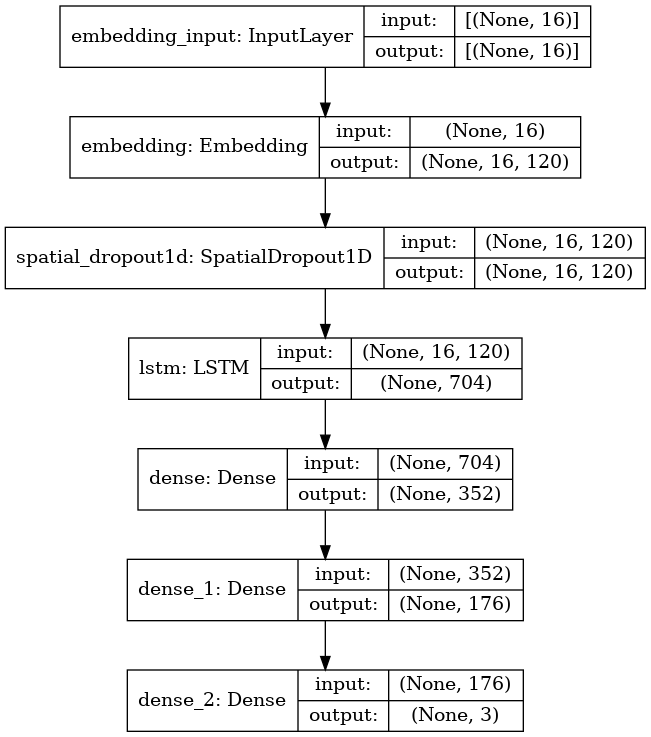

In [21]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
history  = model.fit(X, Y, epochs = 30, batch_size=32, verbose =1)

2022-07-23 13:56:31.313221: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
12/12 [==============================] - 4s 73ms/step - loss: 1.0624 - accuracy: 0.4543
Epoch 2/30
12/12 [==============================] - 1s 72ms/step - loss: 0.9261 - accuracy: 0.6371
Epoch 3/30
12/12 [==============================] - 1s 70ms/step - loss: 0.6626 - accuracy: 0.7363
Epoch 4/30
12/12 [==============================] - 1s 72ms/step - loss: 0.5496 - accuracy: 0.7911
Epoch 5/30
12/12 [==============================] - 1s 71ms/step - loss: 0.4608 - accuracy: 0.8277
Epoch 6/30
12/12 [==============================] - 1s 71ms/step - loss: 0.3646 - accuracy: 0.8799
Epoch 7/30
12/12 [==============================] - 1s 75ms/step - loss: 0.3517 - accuracy: 0.8590
Epoch 8/30
12/12 [==============================] - 1s 87ms/step - loss: 0.2778 - accuracy: 0.8930
Epoch 9/30
12/12 [==============================] - 1s 86ms/step - loss: 0.2484 - accuracy: 0.9060
Epoch 10/30
12/12 [==============================] - 1s 70ms/step - loss: 0.2356 - accuracy: 0.9112
Epoch 11/

# Preparing the Test Data

In [23]:
test = pd.read_csv('../input/sanskrit-shlokas-dataset/valid.csv')
test

,Sloka,Class
0,यो यस्मिन् कर्माणि कुशलस्तं तस्मित्रैव योजयेत्...,sanskrit-slogan
1,अध्ययनेन/अध्ययनं वीना ज्ञानं न भवति ॥,sanskrit-slogan
2,पुष्पं पुष्पं विचिन्वीत मूलच्छेदं न कारयेत् । ...,Vidur Niti Slokas
3,मृजया रक्ष्यते रूपम् ॥,sanskrit-slogan
4,मूर्खश्चिरायुर्जातोऽपि तस्माज्जातमृतो वरः। ...,Chanakya Slokas
...,...,...
91,छात्राः अनुशासिताः भवेयुः ॥,sanskrit-slogan
92,स्वजातिः दुरतिक्रमा ॥,sanskrit-slogan
93,यद् भविष्यो विनश्यति ॥,sanskrit-slogan
94,यस्यार्थास्तस्य मित्राणि यस्यार्थास्तस्य बान...,Chanakya Slokas


In [24]:
X_test = tokenizer.texts_to_sequences(test['Sloka'].values)
X_test = pad_sequences(X_test)

In [25]:
Y_test = pd.get_dummies(test['Class'])
Y

,Chanakya Slokas,Vidur Niti Slokas,sanskrit-slogan
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
378,0,1,0
379,1,0,0
380,0,1,0
381,1,0,0


In [26]:
model.evaluate(X_test,Y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.8103 - accuracy: 0.7917


[0.8103179931640625, 0.7916666865348816]